# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [10]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

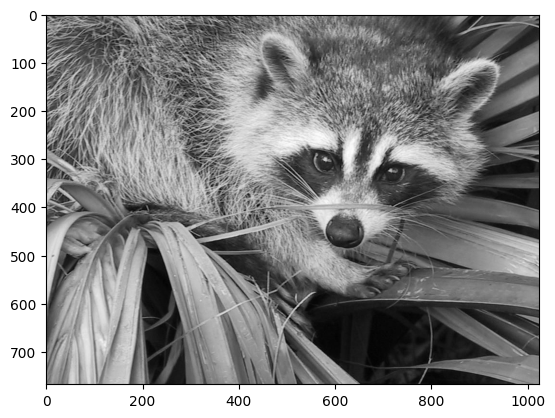

In [11]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

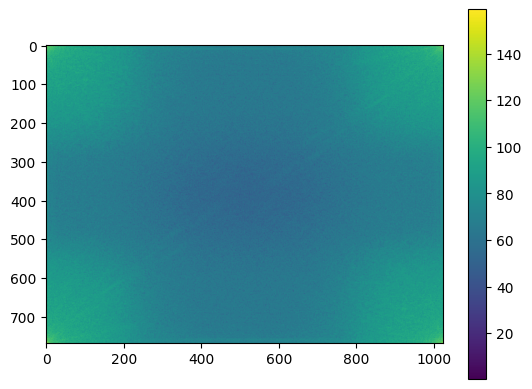

In [12]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

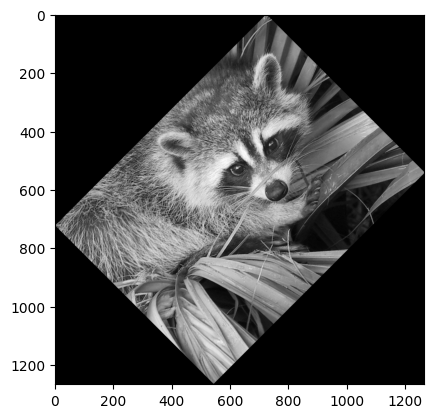

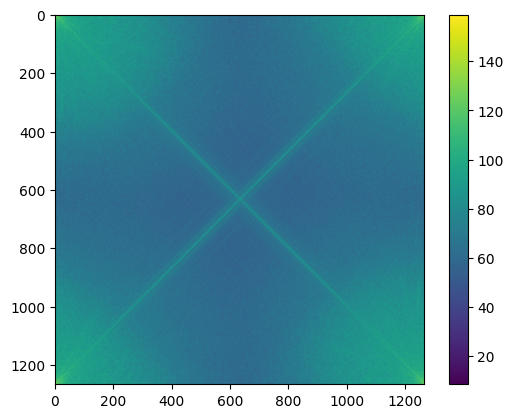

In [13]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

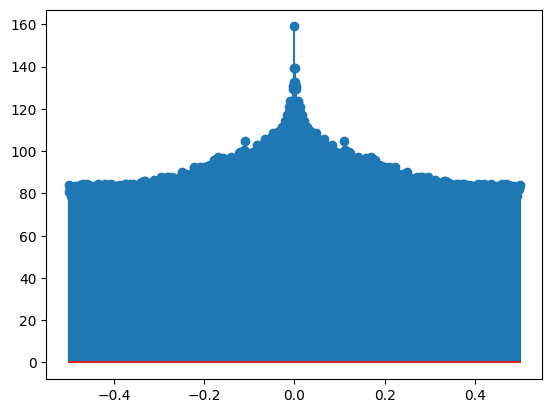

In [14]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

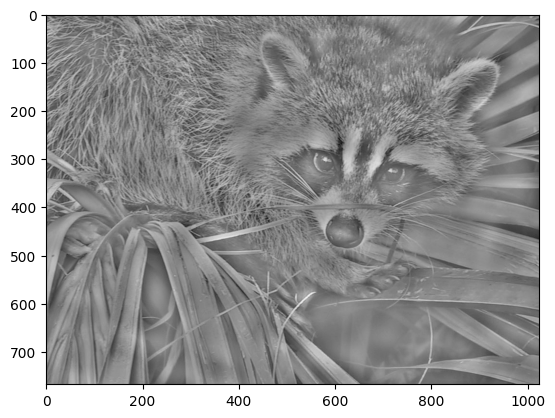

In [15]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

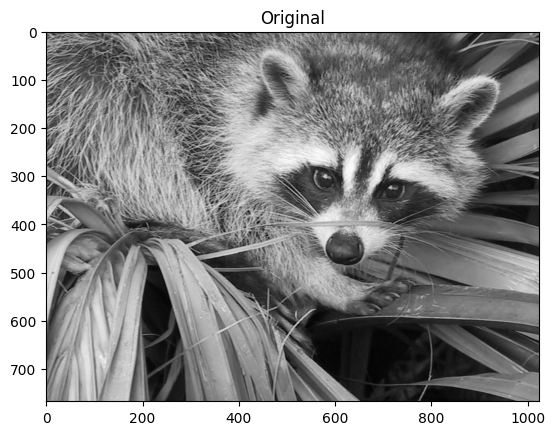

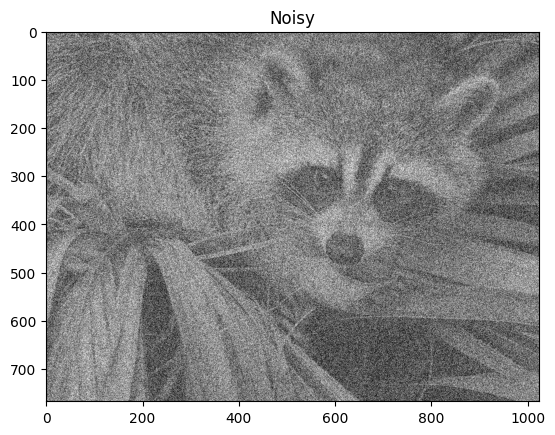

In [16]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 6](https://cs.unibuc.ro/~pirofti/ps/ps-lab-6.pdf).

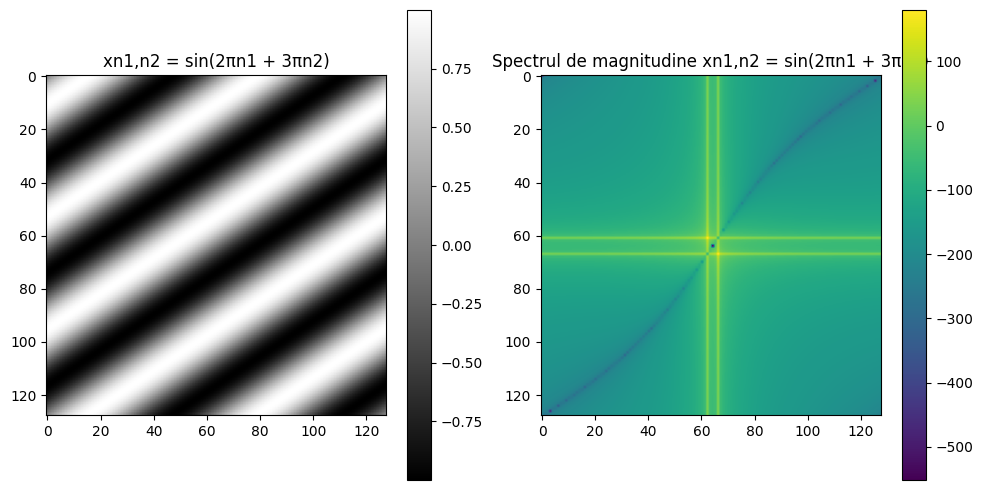

In [17]:
# Ex. 1
# Informatia este in domeniul timpului si o transformam in domeniul frecventei.

N1, N2 = 128, 128

n1, n2 = np.meshgrid(np.linspace(0, 2, N1), np.linspace(0, 2, N2))

xn1_n2_new = np.sin(2 * np.pi * n1 + 3 * np.pi * n2)
Ym1_m2_new = np.fft.fft2(xn1_n2_new)

Ym1_m2_shifted = np.fft.fftshift(Ym1_m2_new)
magnitude_spectrum = 20 * np.log(np.abs(Ym1_m2_shifted) + 1e-12)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("xn1,n2 = sin(2πn1 + 3πn2)")
plt.imshow(xn1_n2_new, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Spectrul de magnitudine xn1,n2 = sin(2πn1 + 3πn2)")
plt.imshow(magnitude_spectrum, cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()

# Indicii celor 2 componente influenteaza imaginea (genereaza o inclinatie diferita)
# Din spectrul de magnitudine putem observa faptul ca avem 2 componente, una cu frecventa 2 Hz si una cu frecventa 3 Hz. (Desi sunt 4 linii, tinem cont de simetria componentelor)

[[1.         1.19660644 1.38553834 ... 0.61446166 0.80339356 1.        ]
 [0.95626457 1.15287101 1.34180291 ... 0.57072622 0.75965813 0.95626457]
 [0.82888384 1.02549028 1.21442219 ... 0.4433455  0.6322774  0.82888384]
 ...
 [0.82888384 1.02549028 1.21442219 ... 0.4433455  0.6322774  0.82888384]
 [0.95626457 1.15287101 1.34180291 ... 0.57072622 0.75965813 0.95626457]
 [1.         1.19660644 1.38553834 ... 0.61446166 0.80339356 1.        ]]


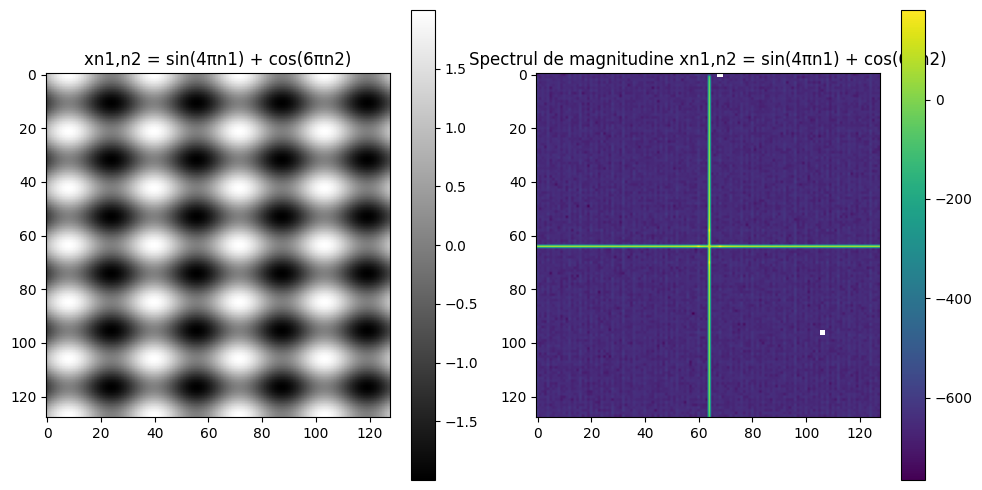

In [18]:
# Informatia este in domeniul timpului si o transformam in domeniul frecventei.

n1, n2 = np.meshgrid(np.linspace(0, 2, N1), np.linspace(0, 2, N2))

xn1_n2_new = np.sin(4 * np.pi * n1) + np.cos(6 * np.pi * n2)
Ym1_m2_new = np.fft.fft2(xn1_n2_new)

print(xn1_n2_new)

Ym1_m2_shifted = np.fft.fftshift(Ym1_m2_new)

magnitude_spectrum = 20 * np.log(np.abs(Ym1_m2_shifted))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("xn1,n2 = sin(4πn1) + cos(6πn2)")
plt.imshow(xn1_n2_new, cmap='gray')  
plt.colorbar() 

plt.subplot(1, 2, 2)
plt.title("Spectrul de magnitudine xn1,n2 = sin(4πn1) + cos(6πn2)")
plt.imshow(magnitude_spectrum, cmap='viridis')  
plt.colorbar()   

plt.tight_layout()
plt.show()

# Informatia/Imaginea oscileaza pe randuri si coloane, avand periodic minime si maxime.

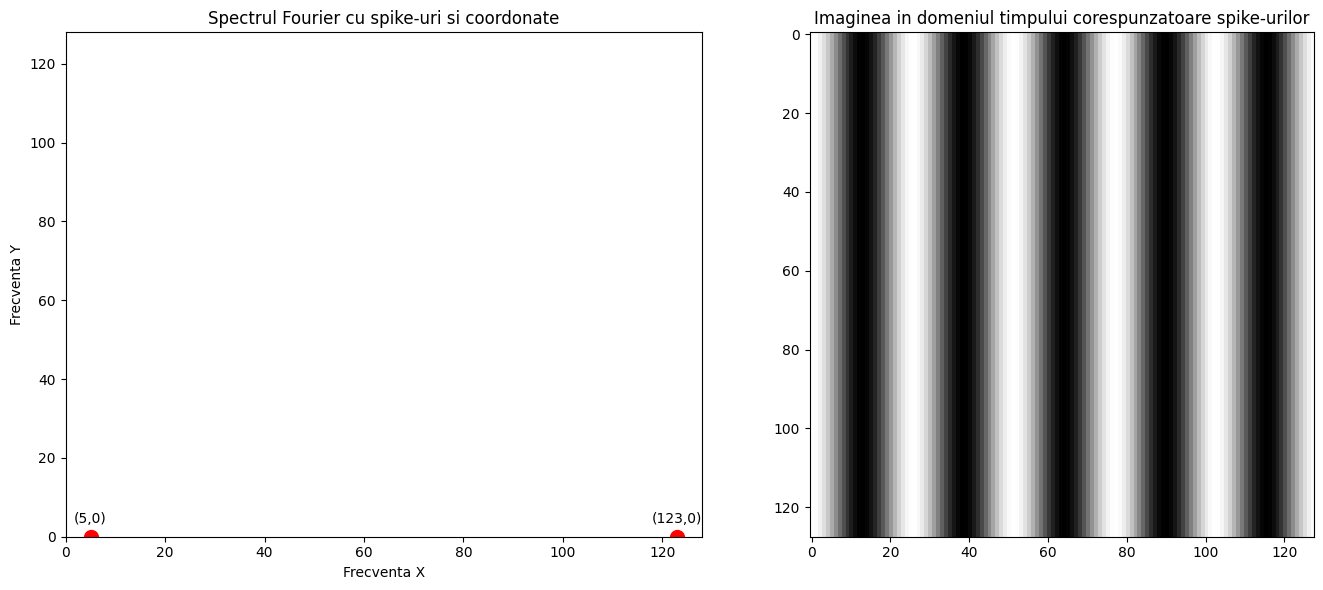

In [19]:
# Informatia este in domeniul frecventei si o transformam in domeniul timpului.
Y_new = np.zeros((N1, N2), dtype=complex)
Y_new[0, 5] = 1
Y_new[0, N2 - 5] = 1

X_new = np.fft.ifft2(Y_new).real

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

points_x = [5, N2-5]
points_y = [0, 0]

# Afisam spike-urile cu functia "scatter" pentru spectrul Fourier si adaugam coordonatele, deoarece acestea nu sunt vizibile clar daca am folosi un "colormap".
axes[0].scatter(points_x, points_y, color='red', s=100)
for i, txt in enumerate(points_x):
    axes[0].annotate(f"({txt},{points_y[i]})", (points_x[i], points_y[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[0].set_xlim(0, N2)
axes[0].set_ylim(0, N2)
axes[0].set_title('Spectrul Fourier cu spike-uri si coordonate')
axes[0].set_xlabel('Frecventa X')
axes[0].set_ylabel('Frecventa Y')

axes[1].imshow(X_new, cmap='gray')
axes[1].set_title('Imaginea in domeniul timpului corespunzatoare spike-urilor')

plt.tight_layout()
plt.show()

# Y[0,5] reprezinta componenta de frecventa de-a lungul axei orizontale a imaginii.
# Y[0, N2-5] este conjugatul lui Y[0,5].
# In Fourier, avem componente DFT Y[K]=Y[N-K]*
# Indicele 0 pentru prima coordonata => Nu exista variatie pe axa verticala (coloanele imaginii), deci nu exista oscilatie pe directia respectiva.
# Indicele 5 pentru a doua coordonata => Frecventa pe axa orizontala (randurile imaginii). Are 5 perioade complete pe întreaga latime a imaginii.

# In domeniul spatial, Y[0,5] produce o serie de benzi verticale care se repetă de 5 ori pe latimea intregii imagini.
# Fiecare banda reprezinta o crestere si o scadere completa (un ciclu/o perioada) a valorii pixelului de la stins (intuneric/negru) la aprins complet (lumina/alb) si inapoi.

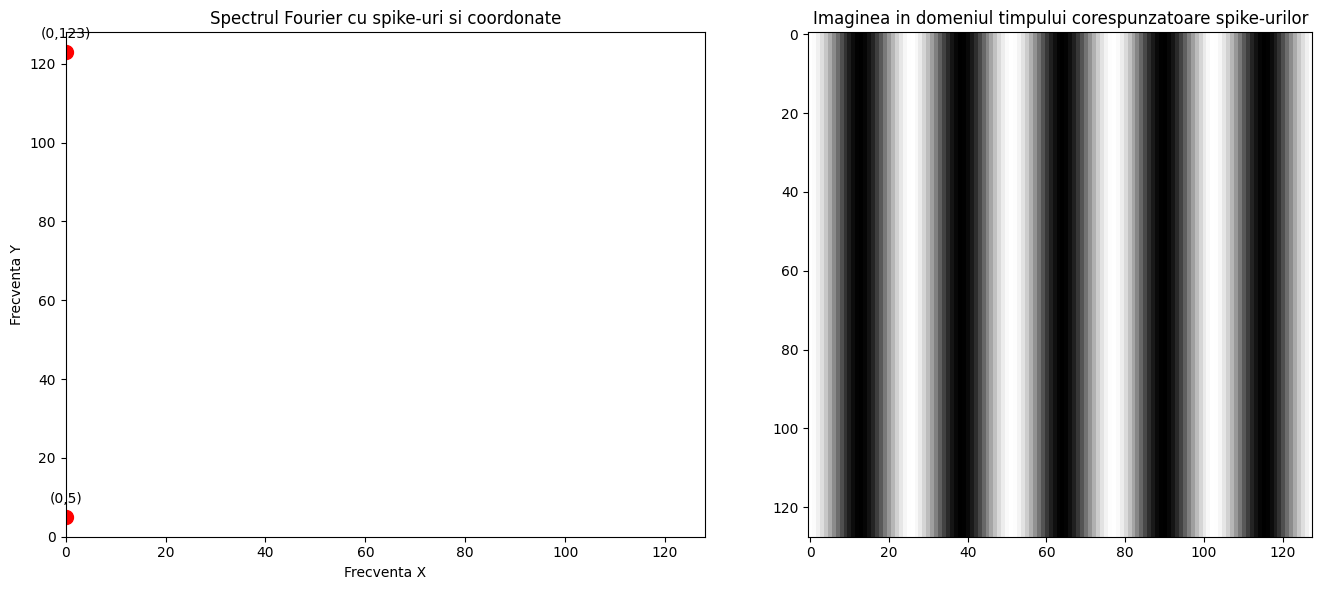

In [20]:
# Informatia este in domeniul frecventei si o transformam in domeniul timpului.
Y_new = np.zeros((N1, N2), dtype=complex)
Y_new[5, 0] = 1
Y_new[N2 - 5, 0] = 1

X = np.fft.ifft2(Y).real

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

points_y = [5, N2-5]
points_x = [0, 0]

axes[0].scatter(points_x, points_y, color='red', s=100)
for i, txt in enumerate(points_y):
    axes[0].annotate(f"({points_x[i]},{txt})", (points_x[i], points_y[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[0].set_xlim(0, N2)
axes[0].set_ylim(0, N2)
axes[0].set_title('Spectrul Fourier cu spike-uri si coordonate')
axes[0].set_xlabel('Frecventa X')
axes[0].set_ylabel('Frecventa Y')

axes[1].imshow(X_new, cmap='gray')
axes[1].set_title('Imaginea in domeniul timpului corespunzatoare spike-urilor')

plt.tight_layout()
plt.show()

# Y[5,0] si Y[N-5,0] reprezinta componente de frecventa de-a lungul axei verticale a imaginii.
# Indicii 5 și N-5 pentru prima coordonata => Exista variatii pe axa verticala (de-a lungul coloanelor imaginii), cu 5 cicluri complete pe intreaga inaltime a imaginii.
# In domeniul spatial, aceasta produce o serie de benzi orizontale care se repetă de 5 ori pe inaltimea imaginii.

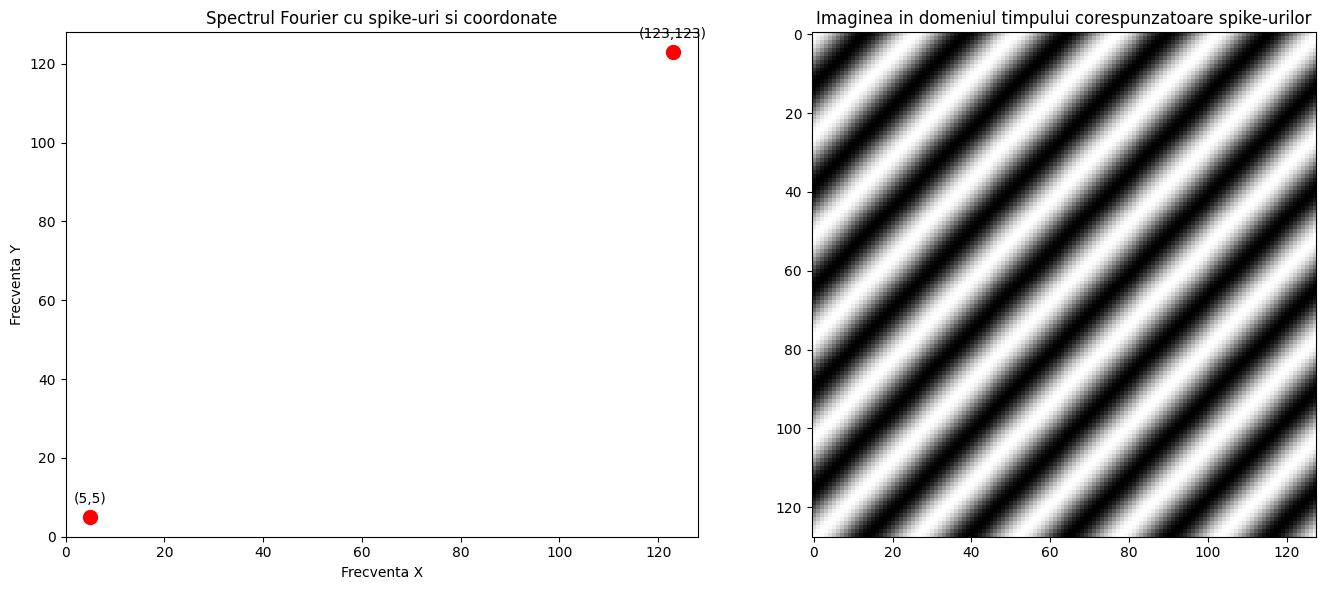

In [21]:
# Informatia este in domeniul frecventei si o transformam in domeniul timpului.

Y_new = np.zeros((N1, N2), dtype=complex)
Y_new[5, 5] = 1
Y_new[N1 - 5, N2 - 5] = 1

X_new = np.fft.ifft2(Y_new).real

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

points_x = [5, N2-5]
points_y = [5, N2-5]

axes[0].scatter(points_x, points_y, color='red', s=100)
for i, txt in enumerate(points_x):
    axes[0].annotate(f"({txt},{points_y[i]})", (points_x[i], points_y[i]), textcoords="offset points", xytext=(0,10), ha='center')
axes[0].set_xlim(0, N2)
axes[0].set_ylim(0, N2)
axes[0].set_title('Spectrul Fourier cu spike-uri si coordonate')
axes[0].set_xlabel('Frecventa X')
axes[0].set_ylabel('Frecventa Y')

axes[1].imshow(X_new, cmap='gray')
axes[1].set_title('Imaginea in domeniul timpului corespunzatoare spike-urilor')

plt.tight_layout()
plt.show()

# Cazul acesta este o combinatie a celor 2 cazuri de mai sus.
# Astfel, din compunerea imaginii cu benzi verticale si cea cu benzi orizontale, reiese imaginea cu benzi inclinate cu 45 grade (diagonale).

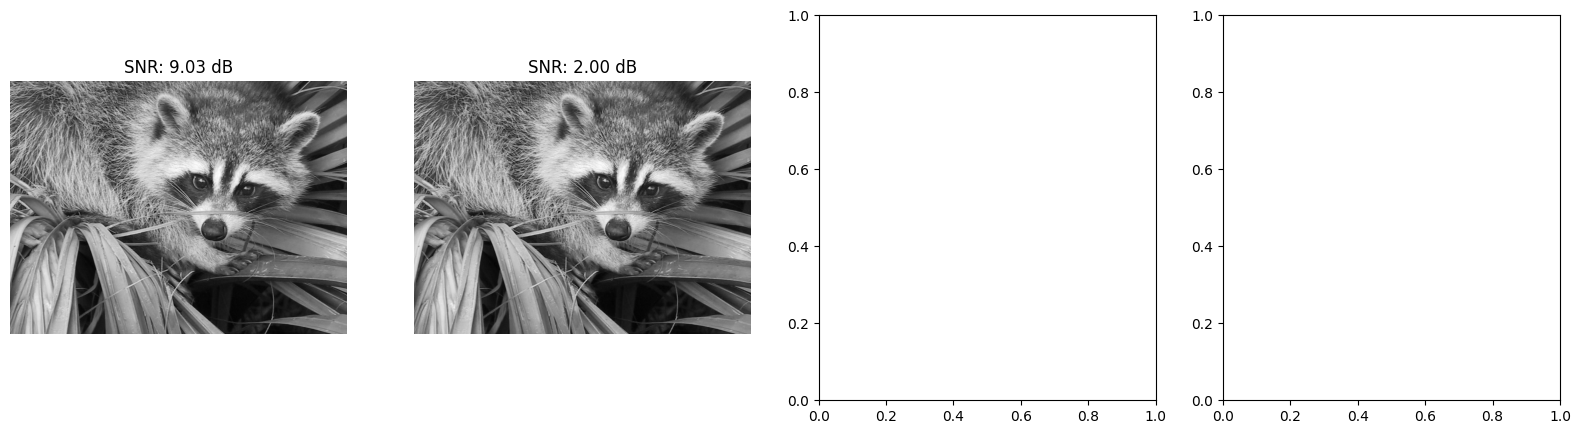

In [22]:
# Ex. 2.
X = misc.face(gray=True)

Y = np.fft.fft2(X)
Y_shifted = np.fft.fftshift(Y)

# Prin centrarea spectrului, aducem componenta de frecventa 0 in centrul spectrului.
# Astfel, spectrul este inteles mai usor (intuitiv): frecventele joase sunt in centru, iar frecventele inalte sunt spre margini.
power_spectrum = np.abs(Y_shifted)**2

# Signal-to-Noise Ratio - Raportul intre cele 2 puteri in log
signal_power = np.sum(power_spectrum)
noise_power = np.sum(power_spectrum[power_spectrum < np.mean(power_spectrum)])
current_SNR = 10 * np.log10(8)

# Am selectat un array de 4 valori SNR dorite pentru o comparatie facila
desired_SNR_values = [current_SNR, 2]

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for idx, desired_SNR in enumerate(desired_SNR_values):
    Y_shifted_copy = Y_shifted.copy()
    for i in range(Y_shifted_copy.shape[0]):
        for j in range(Y_shifted_copy.shape[1]):
            if 10 * np.log10(power_spectrum[i, j]) < desired_SNR:
                Y_shifted_copy[i, j] = 0

    # Aplicam transformata Fourier inversa pentru a obtine imaginea comprimata
    Y_shifted_copy = np.fft.ifftshift(Y_shifted_copy) # Decentrarea spectrului
    X_compressed = np.fft.ifft2(Y_shifted_copy)
    X_compressed = np.real(X_compressed) # Conversia la valori reale

    axs[idx].imshow(X_compressed, cmap=plt.cm.gray)
    axs[idx].set_title(f"SNR: {desired_SNR:.2f} dB")
    axs[idx].axis('off')

plt.show()

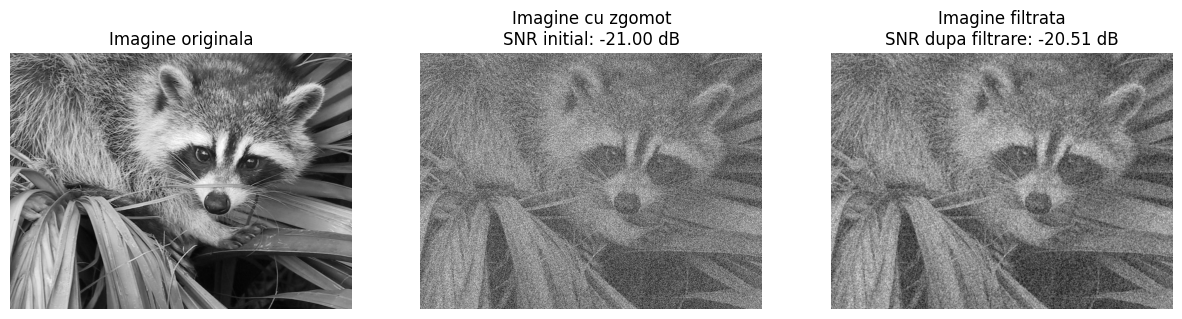

In [23]:
# Ex. 3.
def calculate_SNR(image, noise):
    signal_power = np.sum(image ** 2)
    noise_power = np.sum(noise ** 2)
    SNR = 10 * np.log10(signal_power / noise_power)
    return SNR

SNR_before = calculate_SNR(X, noise)

filtered_image = ndimage.uniform_filter(X_noisy, size=3) # Aplicam un filtru uniform

noise_after_filter = X_noisy - filtered_image
SNR_after = calculate_SNR(X, noise_after_filter)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(X, cmap=plt.cm.gray)
axs[0].set_title('Imagine originala')
axs[0].axis('off')

axs[1].imshow(X_noisy, cmap=plt.cm.gray)
axs[1].set_title(f'Imagine cu zgomot\nSNR initial: {SNR_before:.2f} dB')
axs[1].axis('off')

axs[2].imshow(filtered_image, cmap=plt.cm.gray)
axs[2].set_title(f'Imagine filtrata\nSNR dupa filtrare: {SNR_after:.2f} dB')
axs[2].axis('off')

plt.show()

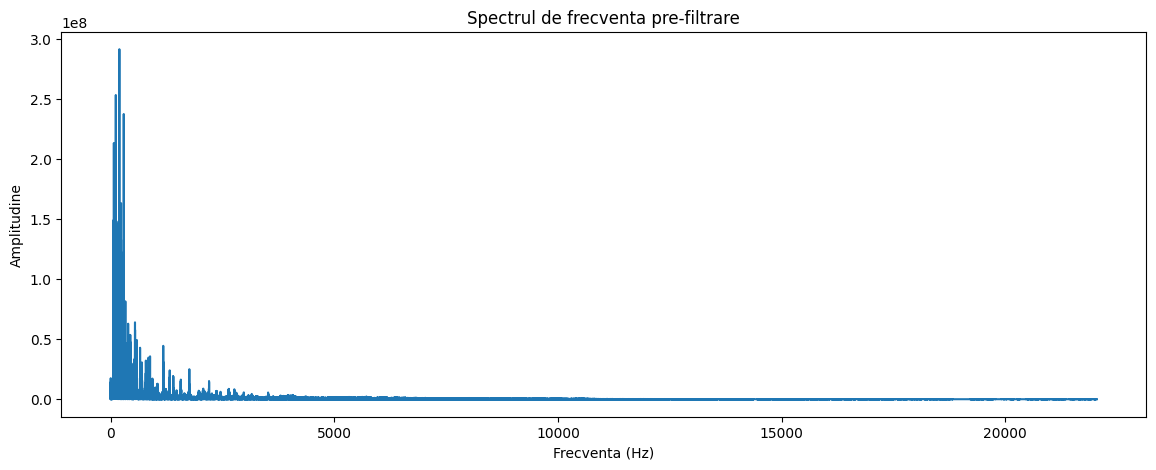

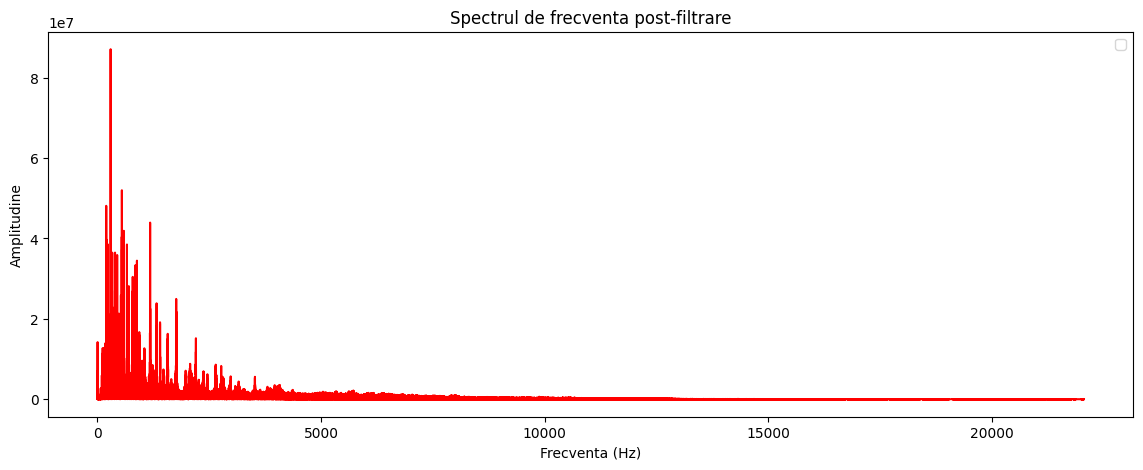

Fișierul audio modificat a fost salvat: ps-tema-2-ex-4-filtered.wav


In [24]:
# Ex. 4.
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import rfft, irfft
from scipy.signal import butter, sosfilt

file_path_mix = 'ps-lab-6-exercitii.wav'
sample_rate_mix, data_mix = wavfile.read(file_path_mix)

if len(data_mix.shape) == 2:
    data_mix = data_mix.mean(axis=1)

fft_data_mix = rfft(data_mix)
freqs_mix = np.fft.rfftfreq(len(data_mix), 1/sample_rate_mix)

plt.figure(figsize=(14, 5))
plt.plot(freqs_mix, np.abs(fft_data_mix))
plt.title("Spectrul de frecventa pre-filtrare")
plt.xlabel("Frecventa (Hz)")
plt.ylabel("Amplitudine")
plt.show()

frecventa_centrala = 233.3420781857952
bandwidth = 230

lowcut = max(frecventa_centrala - bandwidth, 0)
highcut = min(frecventa_centrala + bandwidth, sample_rate_mix / 2 - 1)

if lowcut <= 0 or highcut >= sample_rate_mix / 2:
    raise ValueError("Frecventele de taiere trebuie sa apartina intervalului (0, Frecventa Nyquist)")

sos = butter(2, [lowcut / (sample_rate_mix / 2), highcut / (sample_rate_mix / 2)], btype='bandstop', output='sos')
filtered_signal_mix = sosfilt(sos, data_mix)

normalized_filtered_signal_mix = np.int16(filtered_signal_mix / np.max(np.abs(filtered_signal_mix)) * 32767)

output_file_path_mix = 'ps-tema-2-ex-4-filtered.wav'
wavfile.write(output_file_path_mix, sample_rate_mix, normalized_filtered_signal_mix)

fft_filtered_signal_mix = rfft(filtered_signal_mix)

plt.figure(figsize=(14, 5))
plt.plot(freqs_mix, np.abs(fft_filtered_signal_mix), color='red')
plt.title("Spectrul de frecventa post-filtrare")
plt.xlabel("Frecventa (Hz)")
plt.ylabel("Amplitudine")
plt.legend()
plt.show()

print(f"Fișierul audio modificat a fost salvat: {output_file_path_mix}")